<a href="https://colab.research.google.com/github/Pamela2710/Data-Mining/blob/main/DataProcessingClassification/DataProcessing_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [119]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, mutual_info_classif
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.base import clone
from scipy.stats import entropy
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')


# Función para cargar y preprocesar los datos
def load_and_preprocess_data():
    dataset = pd.read_csv('https://raw.githubusercontent.com/Pamela2710/Data-Mining/main/DataProcessing/features_completas.csv', encoding='latin-1')
    dataset.dropna(inplace=True)
    dataset.drop(columns=['espectrograma etiqueta'], inplace=True)  # Eliminar columna no relevante

    label_encoder = LabelEncoder()
    dataset['Etiqueta'] = label_encoder.fit_transform(dataset['Etiqueta'])

    X = dataset.iloc[:, :-1]
    y = dataset['Etiqueta']

    return pd.DataFrame(X, columns=X.columns), y


x, y = load_and_preprocess_data()


scaler = MinMaxScaler()

# Normalización
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


In [ ]:
x_scaled

,Media tiempo,Desviacion estandar tiempo,Varianza tiempo,Entropia tiempo,kurtosis tiempo,MSE tiempo,Tiempo en alcanzar el pico maximo en frecuencia,RMS tiempo,Peak2peak tiempo,TIEMPO peak2rms,...,perimeter,skewness,solidity,std_dev,x_center_mass,x_centroid,x_centroid_cm_diff,y_center_mass,y_centroid,y_centroid_cm_diff
0,0.099520,0.226593,0.102626,0.0,0.013447,0.907095,0.115646,0.226602,0.163998,0.110557,...,0.750000,0.262347,0.0,0.014767,0.503906,0.503906,0.0,0.503906,0.503906,0.0
1,0.085819,0.873569,0.795442,0.0,0.050793,0.351758,0.306122,0.873538,1.000000,0.238391,...,0.402174,0.009667,0.0,0.499546,0.152344,0.152344,0.0,0.152344,0.152344,0.0
2,0.077419,0.211654,0.093624,0.0,0.015484,0.882481,0.122449,0.211665,0.154592,0.130988,...,0.827640,0.046256,0.0,0.174953,0.537760,0.537760,0.0,0.537760,0.537760,0.0
3,0.102426,0.273302,0.132812,0.0,0.011577,0.910015,0.102041,0.273296,0.160420,0.092834,...,0.874224,0.024948,0.0,0.302965,0.529948,0.529948,0.0,0.529948,0.529948,0.0
4,0.091737,0.414361,0.242705,0.0,0.026587,0.723575,0.108844,0.414371,0.379524,0.141011,...,0.647516,0.071298,0.0,0.113770,0.251302,0.251302,0.0,0.251302,0.251302,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,0.101867,0.194363,0.083598,0.0,0.018980,0.875568,0.333333,0.194357,0.163733,0.131218,...,0.354037,0.062165,0.0,0.099423,0.536458,0.536458,0.0,0.536458,0.536458,0.0
675,0.086898,0.672442,0.516633,0.0,0.038755,0.298080,0.455782,0.672435,0.504299,0.150002,...,0.583851,0.012588,0.0,0.607553,0.333333,0.333333,0.0,0.333333,0.333333,0.0
676,0.077123,0.537215,0.361351,0.0,0.024871,0.207060,0.510204,0.537213,0.259182,0.084483,...,0.591615,0.020329,0.0,0.372771,0.292969,0.292969,0.0,0.292969,0.292969,0.0
677,0.079244,0.713007,0.568258,0.0,0.031290,0.165912,0.551020,0.713004,0.407889,0.102759,...,0.482919,0.014551,0.0,0.554368,0.358073,0.358073,0.0,0.358073,0.358073,0.0


Lectura de subconjuntos

In [ ]:
subsets = pd.read_csv('https://raw.githubusercontent.com/Pamela2710/Data-Mining/main/DataProcessingClassification/top_five_subsets4.csv', encoding='latin-1')
subsets

,Top Subset,Importance,AUC Score
0,[ 0 4 16 18 19 20 21 22 25 27 29 ...,0.084347,0.919118
1,[ 2 5 11 12 13 14 18 22 23 24 25 ...,0.084067,0.911765
2,[ 4 6 9 12 20 21 24 25 26 27 31 ...,0.082619,0.919118
3,[ 0 9 13 16 19 20 22 23 24 26 27 ...,0.082546,0.919118
4,[ 0 1 3 5 7 9 12 14 19 20 22 ...,0.082457,0.919118


Seleccion de primeros 3 subconjuntos

In [ ]:
sub = subsets.iloc[:3, subsets.columns.get_loc('Top Subset')]
sub

0    [  0   4  16  18  19  20  21  22  25  27  29  ...
1    [  2   5  11  12  13  14  18  22  23  24  25  ...
2    [  4   6   9  12  20  21  24  25  26  27  31  ...
Name: Top Subset, dtype: object

In [ ]:
a = [ '[  0   4   6  13  14  18  20  22  23  26  30  34  37  41  45  48  49  50 51  54  57  58  62  66  69  74  75  76  77  78  81  82  83  85  86  89 92  93  94  95  99 102 103 106 107]',
  '[  3   8  12  13  15  17  19  23  24  25  26  27  29  32  35  36  38  41 42  44  47  48  50  51  54  55  57  59  64  68  69  73  77  78  79  81 82  85  86  89  90  91  98 100 102 103 104 106]',
  '[  2   4   5   6  12  15  16  20  22  23  24  25  26  27  29  30  31  33 35  36  40  46  49  50  51  53  57  58  61  62  64  69  71  72  75  76 78  79  81  86  89  90  91  95  97  99 100 101 102 103 104 106]']


In [ ]:
cadenas = [valor for valor in sub]
cadenas

['[  0   4  16  18  19  20  21  22  25  27  29  31  32  33  36  37  38  44\n  45  46  48  49  51  53  56  68  70  71  76  77  78  79  82  84  85  86\n  87  89  94  95  98  99 100 103 104 105 106 107]',
 '[  2   5  11  12  13  14  18  22  23  24  25  26  27  29  30  31  32  37\n  42  45  48  49  52  54  56  58  61  63  64  66  68  73  75  76  77  78\n  79  80  82  85  90  91  92  99 103 106 107]',
 '[  4   6   9  12  20  21  24  25  26  27  31  33  36  37  38  44  45  46\n  47  48  49  51  58  59  61  63  67  68  70  74  76  77  78  81  84  85\n  89  91  93  97  98  99 100 103 105 106]']

In [ ]:
import re
arreglos = []

# Procesar cada cadena
for cadena in a:
    # Extraer números de la cadena
    numeros = [int(numero) for numero in re.findall(r'\d+', cadena)]
    arreglos.append(numeros)

for i, arreglo in enumerate(arreglos):
    print(f'Sub {i + 1}: {arreglo}')

Sub 1: [0, 4, 6, 13, 14, 18, 20, 22, 23, 26, 30, 34, 37, 41, 45, 48, 49, 50, 51, 54, 57, 58, 62, 66, 69, 74, 75, 76, 77, 78, 81, 82, 83, 85, 86, 89, 92, 93, 94, 95, 99, 102, 103, 106, 107]
Sub 2: [3, 8, 12, 13, 15, 17, 19, 23, 24, 25, 26, 27, 29, 32, 35, 36, 38, 41, 42, 44, 47, 48, 50, 51, 54, 55, 57, 59, 64, 68, 69, 73, 77, 78, 79, 81, 82, 85, 86, 89, 90, 91, 98, 100, 102, 103, 104, 106]
Sub 3: [2, 4, 5, 6, 12, 15, 16, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 35, 36, 40, 46, 49, 50, 51, 53, 57, 58, 61, 62, 64, 69, 71, 72, 75, 76, 78, 79, 81, 86, 89, 90, 91, 95, 97, 99, 100, 101, 102, 103, 104, 106]


Top 3 conjuntos reducidos y normalizados min-max

In [120]:
a = [ [0, 4, 6, 13, 14, 18, 20, 22, 23, 26, 30, 34, 37, 41, 45, 48, 49, 50, 51, 54, 57, 58, 62, 66, 69, 74, 75, 76, 77, 78, 81, 82, 83, 85, 86, 89, 92, 93, 94, 95, 99, 102, 103, 106, 107],
      [3, 8, 12, 13, 15, 17, 19, 23, 24, 25, 26, 27, 29, 32, 35, 36, 38, 41, 42, 44, 47, 48, 50, 51, 54, 55, 57, 59, 64, 68, 69, 73, 77, 78, 79, 81, 82, 85, 86, 89, 90, 91, 98, 100, 102, 103, 104, 106],
      [2, 4, 5, 6, 12, 15, 16, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 35, 36, 40, 46, 49, 50, 51, 53, 57, 58, 61, 62, 64, 69, 71, 72, 75, 76, 78, 79, 81, 86, 89, 90, 91, 95, 97, 99, 100, 101, 102, 103, 104, 106]]

# Obtener características y etiquetas

X_list = []
for indices in a:
    reduced = x_scaled.iloc[:, indices]
    X_list.append(reduced)

Tecnica Stratified 10-fold cross-validation

In [121]:
def stratified_kfold_cv(X, y, n_splits=10):
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    for train_index, val_index in stratified_kfold.split(X, y):
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]  # Usar .iloc para acceder a las filas por índice
        X_val, y_val = X.iloc[val_index], y.iloc[val_index]

        yield X_train, y_train, X_val, y_val

Naive Bayes

In [122]:
def naive_bayes(X_train, y_train, X_val, y_val):
  # Comprobación de número de clases
    unique_classes_train = np.unique(y_train)
    unique_classes_val = np.unique(y_val)

    missing_class =set(unique_classes_train).symmetric_difference(set(unique_classes_val))
    #print(missing_class)
    if missing_class:
        missing_class = list(missing_class)[0]  # Extract the missing class
        #print(f"clase perdida: {missing_class}")
        # Find indices of samples with the missing class in y_val
        missing_class_indices = np.where(y_train == missing_class)[0]
        # Randomly select one sample with the missing class
        random_index = np.random.choice(missing_class_indices)
        #print(f"objeto añadido: {random_index}")
        # Add the sample with the missing class to the training set
        X_val = pd.concat([X_val, X_train.iloc[[random_index]]], ignore_index=True)
        y_val = pd.concat([y_val, y_train.iloc[[random_index]]], ignore_index=True)

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred1 = nb.predict(X_val)
    y_pred_nb1 = nb.predict_proba(X_val)
    #print('y_pred_nb1', y_pred_nb1)

    accuracy = accuracy_score(y_val, y_pred1)
    precision = precision_score(y_val, y_pred1, average='weighted', zero_division=0)
    recall = recall_score(y_val, y_pred1, average='weighted')
    auc = roc_auc_score(y_val, y_pred_nb1, average='weighted', multi_class='ovr')
    f1 = f1_score(y_val, y_pred1, average='weighted')
    mcc = matthews_corrcoef(y_val, y_pred1)

    return accuracy, precision, recall, auc, f1, mcc

# Initialize lists to store the results for each metric
results1 = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'auc': [],
    'f1': [],
    'mcc': []
}

for i,X in enumerate(X_list):
    print("Set:", i+1)
    for X_train, y_train, X_val, y_val in stratified_kfold_cv(X, y):
        accuracy, precision, recall, auc, f1, mcc = naive_bayes(X_train, y_train, X_val, y_val)

        results1['accuracy'].append(accuracy)
        results1['precision'].append(precision)
        results1['recall'].append(recall)
        results1['auc'].append(auc)
        results1['f1'].append(f1)
        results1['mcc'].append(mcc)

    # Calculate and print the mean and standard deviation for each metric
    for metric_name, metric_values in results1.items():
        mean_metric = np.nanmean(metric_values)
        std_metric = np.nanstd(metric_values)
        print(f"Naive Bayes Average {metric_name.capitalize()}: {mean_metric:.4f} (±{std_metric:.4f})")



Set: 1
Naive Bayes Average Accuracy: 0.4811 (±0.0484)
Naive Bayes Average Precision: 0.8889 (±0.0304)
Naive Bayes Average Recall: 0.4811 (±0.0484)
Naive Bayes Average Auc: 0.8658 (±0.0574)
Naive Bayes Average F1: 0.5829 (±0.0475)
Naive Bayes Average Mcc: 0.3156 (±0.0482)
Set: 2
Naive Bayes Average Accuracy: 0.5140 (±0.0639)
Naive Bayes Average Precision: 0.8910 (±0.0295)
Naive Bayes Average Recall: 0.5140 (±0.0639)
Naive Bayes Average Auc: 0.8721 (±0.0536)
Naive Bayes Average F1: 0.6137 (±0.0649)
Naive Bayes Average Mcc: 0.3323 (±0.0529)
Set: 3
Naive Bayes Average Accuracy: 0.4719 (±0.0904)
Naive Bayes Average Precision: 0.8925 (±0.0303)
Naive Bayes Average Recall: 0.4719 (±0.0904)
Naive Bayes Average Auc: 0.8716 (±0.0535)
Naive Bayes Average F1: 0.5688 (±0.0979)
Naive Bayes Average Mcc: 0.3201 (±0.0539)


k-Nearest Neighbors Classifier

Distance Metric: euclidean
k: 3
Set: 1
kNN Average Accuracy: 0.9108 (±0.0210)
kNN Average Precision: 0.8906 (±0.0227)
kNN Average Recall: 0.9108 (±0.0210)
kNN Average Auc: 0.8681 (±0.0481)
kNN Average F1: 0.8980 (±0.0212)
kNN Average Mcc: 0.6544 (±0.0775)
Set: 2
kNN Average Accuracy: 0.9035 (±0.0241)
kNN Average Precision: 0.8810 (±0.0258)
kNN Average Recall: 0.9035 (±0.0241)
kNN Average Auc: 0.8543 (±0.0494)
kNN Average F1: 0.8896 (±0.0245)
kNN Average Mcc: 0.6270 (±0.0919)
Set: 3
kNN Average Accuracy: 0.9006 (±0.0231)
kNN Average Precision: 0.8794 (±0.0235)
kNN Average Recall: 0.9006 (±0.0231)
kNN Average Auc: 0.8583 (±0.0485)
kNN Average F1: 0.8875 (±0.0227)
kNN Average Mcc: 0.6150 (±0.0856)
k: 5
Set: 1
kNN Average Accuracy: 0.9057 (±0.0244)
kNN Average Precision: 0.8816 (±0.0248)
kNN Average Recall: 0.9057 (±0.0244)
kNN Average Auc: 0.8595 (±0.0485)
kNN Average F1: 0.8913 (±0.0241)
kNN Average Mcc: 0.6338 (±0.0919)
Set: 2
kNN Average Accuracy: 0.9059 (±0.0228)
kNN Average Precision

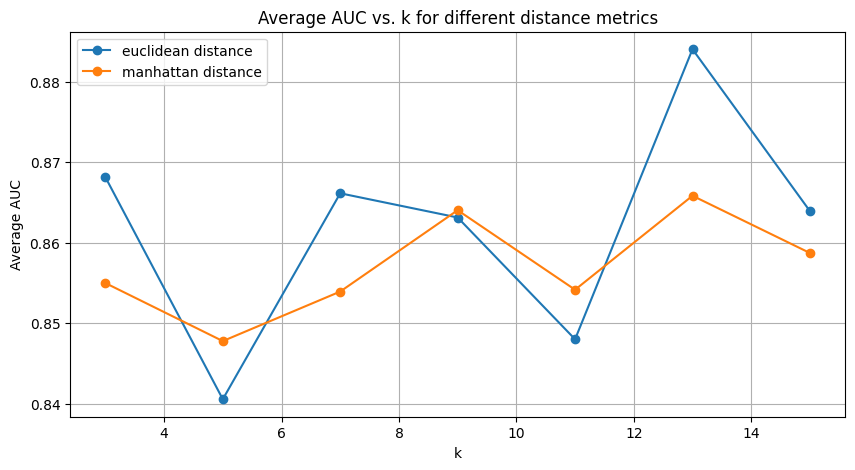

In [123]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'arreglos' is defined somewhere in the code and 'y_' is the target variable
# Assume 'y_' is the series of labels corresponding to the entries of df

# kNN classifier function
def knn_classifier(X_train, y_train, X_val, y_val, k, metric):

    unique_classes_train = np.unique(y_train)
    unique_classes_val = np.unique(y_val)

    missing_class =set(unique_classes_train).symmetric_difference(set(unique_classes_val))
    #print(missing_class)
    if missing_class:
        missing_class = list(missing_class)[0]  # Extract the missing class
        #print(f"clase perdida: {missing_class}")
        # Find indices of samples with the missing class in y_val
        missing_class_indices = np.where(y_train == missing_class)[0]

        # Randomly select one sample with the missing class
        random_index = np.random.choice(missing_class_indices)
        #print(f"objeto añadido: {random_index}")

        # Add the sample with the missing class to the training set
        X_val = pd.concat([X_val, X_train.iloc[[random_index]]], ignore_index=True)
        y_val = pd.concat([y_val, y_train.iloc[[random_index]]], ignore_index=True)

    clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    y_pred_proba = clf.predict_proba(X_val)

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_val, y_pred, average='weighted')
    auc = roc_auc_score(y_val, y_pred_proba, average='weighted', multi_class='ovr')
    f1 = f1_score(y_val, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_val, y_pred)

    return accuracy, precision, recall, auc, f1, mcc

# Initialize lists to store the results for each metric
results_e = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'auc': [],
    'f1': [],
    'mcc': []
}

results_m = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'auc': [],
    'f1': [],
    'mcc': []
}

# Define the distance metrics and range of k values
distance_metrics = ['euclidean', 'manhattan']
k_values = range(3, 16, 2)  # Odd values from 3 to 15
auc_scores= {}
# Main loop for calculating metrics across distance metrics and k values
for metric in distance_metrics:
    print(f"Distance Metric: {metric}")

    for k in k_values:
        print(f"k: {k}")

        for i, X in enumerate(X_list):
            print(f"Set: {i+1}")

            for X_train, y_train, X_val, y_val in stratified_kfold_cv(X, y):
                accuracy, precision, recall, auc, f1, mcc = knn_classifier(X_train, y_train, X_val, y_val, k, metric)
                if metric == 'euclidean':
                  results_e['accuracy'].append(accuracy)
                  results_e['precision'].append(precision)
                  results_e['recall'].append(recall)
                  results_e['auc'].append(auc)
                  results_e['f1'].append(f1)
                  results_e['mcc'].append(mcc)
                else:
                  results_m['accuracy'].append(accuracy)
                  results_m['precision'].append(precision)
                  results_m['recall'].append(recall)
                  results_m['auc'].append(auc)
                  results_m['f1'].append(f1)
                  results_m['mcc'].append(mcc)

            # Calculate and print the mean and standard deviation for each metric
            if metric == 'euclidean':
              for metric_name, metric_values in results_e.items():
                mean_metric = np.nanmean(metric_values)
                std_metric = np.nanstd(metric_values)
                print(f"kNN Average {metric_name.capitalize()}: {mean_metric:.4f} (±{std_metric:.4f})")

            else:
              for metric_name, metric_values in results_m.items():
                mean_metric = np.nanmean(metric_values)
                std_metric = np.nanstd(metric_values)
                print(f"kNN Average {metric_name.capitalize()}: {mean_metric:.4f} (±{std_metric:.4f})")


# Plot the average AUC for each k value and distance metric
plt.figure(figsize=(10, 5))  # Set the figure size
for metric in distance_metrics:
    auc_scores = []

    # Calculate AUC scores for each k value
    for k_index, k in enumerate(k_values):
      if metric == 'euclidean':
          auc_scores.append(np.mean(results_e['auc'][k_index*10:(k_index+1)*10]))
      else:
          auc_scores.append(np.mean(results_m['auc'][k_index*10:(k_index+1)*10]))

      #auc_scores.append(np.mean(results['auc'][k_index*10:(k_index+1)*10]))

    plt.plot(k_values, auc_scores, marker='o', label=f"{metric} distance")




#plt.plot(k_values, auc_scores['euclidean'], marker='o', label="euclidean distance")
#plt.plot(k_values, auc_scores['manhattan'], marker='o', label="manhattan distance")
plt.xlabel('k')
plt.ylabel('Average AUC')
plt.title('Average AUC vs. k for different distance metrics')
plt.legend()
plt.grid(True)
plt.show()


In [125]:
# Find and print the best metrics for Naive Bayes

bestresultsNB = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'auc': [],
    'f1': [],
    'mcc': []
}

bestresultsKNNE = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'auc': [],
    'f1': [],
    'mcc': []
}

bestresultsKNNM = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'auc': [],
    'f1': [],
    'mcc': []
}

bestresultsNB['accuracy'].append(results1['accuracy'])
bestresultsNB['precision'].append(results1['precision'])
bestresultsNB['recall'].append(results1['recall'])
bestresultsNB['auc'].append(results1['auc'])
bestresultsNB['f1'].append(results1['f1'])
bestresultsNB['mcc'].append(results1['mcc'])

# Calculate and print the mean and standard deviation for each metric
print('Best metric Naive Bayes')
for metric_name, values in bestresultsNB.items():
    print(f"{metric_name.capitalize()}: {np.max(values):.4f}")


bestresultsKNNE['accuracy'].append(results_e['accuracy'])
bestresultsKNNE['precision'].append(results_e['precision'])
bestresultsKNNE['recall'].append(results_e['recall'])
bestresultsKNNE['auc'].append(results_e['auc'])
bestresultsKNNE['f1'].append(results_e['f1'])
bestresultsKNNE['mcc'].append(results_e['mcc'])

# Calculate and print the mean and standard deviation for each metric
print('Best metric KNN Euclidean')
for metric_name, values in bestresultsKNNE.items():
    print(f"{metric_name.capitalize()}: {np.max(values):.4f}")

bestresultsKNNM['accuracy'].append(results_m['accuracy'])
bestresultsKNNM['precision'].append(results_m['precision'])
bestresultsKNNM['recall'].append(results_m['recall'])
bestresultsKNNM['auc'].append(results_m['auc'])
bestresultsKNNM['f1'].append(results_m['f1'])
bestresultsKNNM['mcc'].append(results_m['mcc'])

# Calculate and print the mean and standard deviation for each metric
print('Best metric KNN Manhattan')
for metric_name, values in bestresultsKNNM.items():
    print(f"{metric_name.capitalize()}: {np.max(values):.4f}")


Best metric Naive Bayes
Accuracy: 0.6176
Precision: 0.9422
Recall: 0.6176
Auc: 0.9645
F1: 0.7236
Mcc: 0.4387
Best metric KNN Euclidean
Accuracy: 0.9706
Precision: 0.9431
Recall: 0.9706
Auc: 0.9793
F1: 0.9564
Mcc: 0.8827
Best metric KNN Manhattan
Accuracy: 0.9706
Precision: 0.9431
Recall: 0.9706
Auc: 0.9904
F1: 0.9564
Mcc: 0.8827
